In [249]:
from google.colab import files, drive
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler

In [250]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Kaggle/kaggle_jul')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
df_train = pd.read_csv("train.csv")

In [252]:
df_train

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

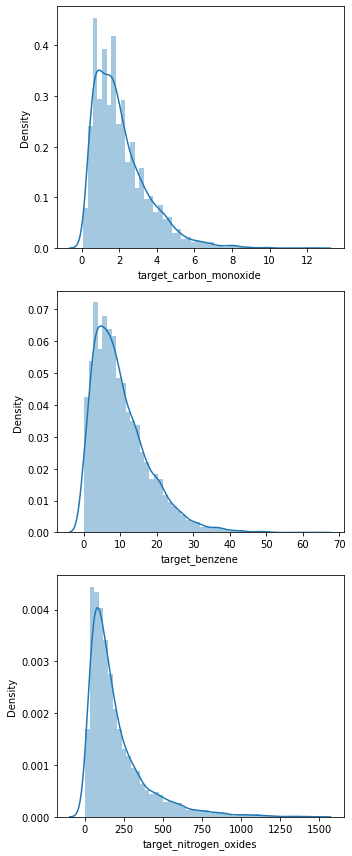

In [253]:
fig, axes = plt.subplots(3, figsize=(5,12))
x = 0
for col in df_train.columns[9:]:
  sns.distplot(df_train[col], ax = axes[x])
  # axes[x][y].title(col)
  x += 1
  # if x == 0:
  #   y += 1
plt.tight_layout()
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

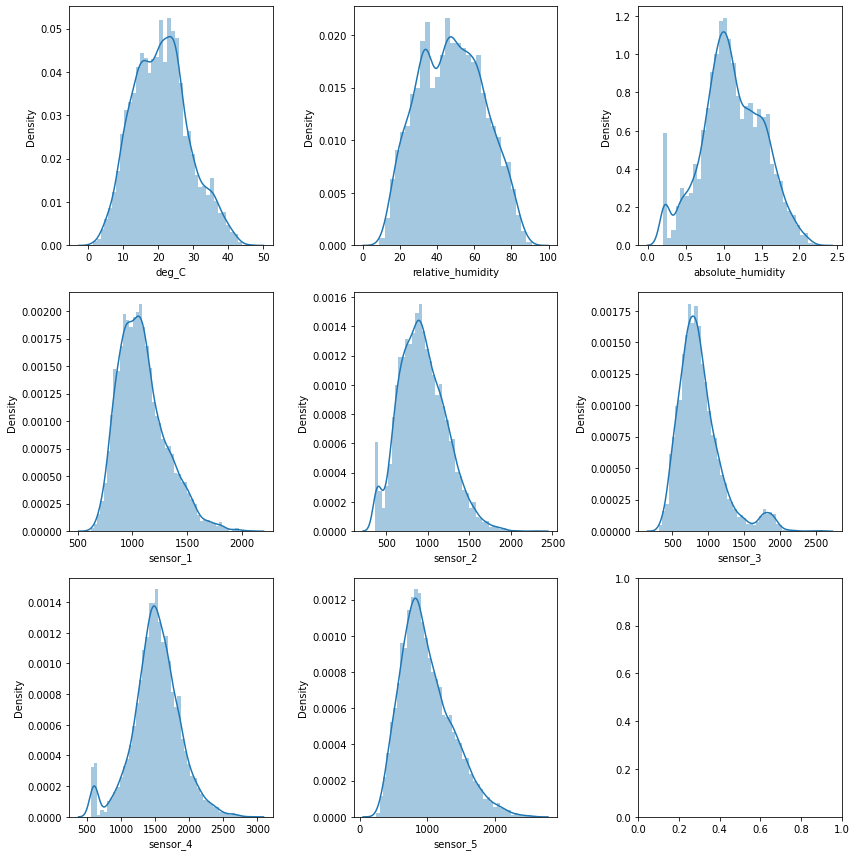

In [254]:
fig, axes = plt.subplots(3,3, figsize=(12,12))
x = 0
y = 0
for col in df_train.columns[1:9]:
  sns.distplot(df_train[col], ax = axes[y][x])
  # axes[x][y].title(col)
  x = (x + 1) % 3
  if x == 0:
    y += 1
plt.tight_layout()
  

In [255]:
feature_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(df_train.iloc[:, 1:9])
scaled_labels = label_scaler.fit_transform(df_train.iloc[:, 9:])

In [256]:
df_train.iloc[:, 1:9] = scaled_features
df_train.iloc[:, 9:] = scaled_labels

In [257]:
df_train.date_time = df_train.date_time.apply(lambda x: pd.to_datetime(x))

In [258]:
df_train

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,0.263393,0.452991,0.275071,0.522411,0.373362,0.330291,0.504003,0.446745,0.193548,0.187107,0.112758
1,2010-03-10 19:00:00,0.265625,0.444444,0.259177,0.448774,0.270401,0.392990,0.379940,0.326630,0.161290,0.154088,0.065968
2,2010-03-10 20:00:00,0.252232,0.577534,0.271332,0.484741,0.291757,0.332152,0.437630,0.371742,0.169355,0.143082,0.085147
3,2010-03-10 21:00:00,0.216518,0.653236,0.289292,0.477316,0.291447,0.351072,0.416621,0.433905,0.169355,0.150943,0.119219
4,2010-03-10 22:00:00,0.236607,0.611722,0.290326,0.443937,0.252089,0.385635,0.365369,0.378205,0.112903,0.099057,0.081542
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,0.176339,0.282051,0.092658,0.258992,0.230682,0.249202,0.150832,0.283941,0.096774,0.078616,0.128672
7107,2010-12-31 21:00:00,0.174107,0.296703,0.087491,0.274114,0.219746,0.284030,0.152484,0.280922,0.104839,0.089623,0.149211
7108,2010-12-31 22:00:00,0.185268,0.313797,0.114260,0.288896,0.208037,0.244284,0.142446,0.389642,0.120968,0.080189,0.153360
7109,2010-12-31 23:00:00,0.149554,0.388278,0.103189,0.226499,0.169143,0.264933,0.154221,0.409711,0.112903,0.070755,0.134589


In [259]:
df_test = pd.read_csv("test.csv")
df_test


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [260]:
X_train = np.array(df_train.iloc[:, 1:9]).reshape(-1, 1, 8)
y_train = np.array(df_train.iloc[:, 9:]).reshape(-1, 1, 3)


In [261]:
y_train.shape

(7111, 1, 3)

In [262]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, input_shape = (1, 8), return_sequences=True)),
  # tf.keras.layers.Dropout(.5),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"), 
  tf.keras.layers.Dense(3),
])

optimizer = tf.keras.optimizers.Adam(0.005)
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=optimizer,
              metrics=["mae"])

In [263]:
#make folder model
model._name = "model_LSTM"
model_save_path = "./models/"
if not os.path.exists(model_save_path):
    os.mkdir(model_save_path)

In [264]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
checkpoint = ModelCheckpoint(os.path.join(model_save_path, model.name+".h5"), save_weights_only=True,
                             verbose=1, save_best_only=True, monitor='val_mae', mode='min')

history = model.fit(X_train, 
                    y_train, 
                    validation_split = 0.2, 
                    epochs=10, 
                    steps_per_epoch = len(X_train)//32,
                    callbacks=[checkpoint]
                   )

Epoch 1/10
222/222 [==============================] - 7s 10ms/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.0836 - val_mae: 0.0836

Epoch 00001: val_mae improved from inf to 0.08364, saving model to ./models/model_LSTM.h5
Epoch 2/10
222/222 [==============================] - 1s 6ms/step - loss: 0.0236 - mae: 0.0236 - val_loss: 0.0718 - val_mae: 0.0718

Epoch 00002: val_mae improved from 0.08364 to 0.07176, saving model to ./models/model_LSTM.h5
Epoch 3/10
222/222 [==============================] - 1s 6ms/step - loss: 0.0224 - mae: 0.0224 - val_loss: 0.0711 - val_mae: 0.0711

Epoch 00003: val_mae improved from 0.07176 to 0.07111, saving model to ./models/model_LSTM.h5
Epoch 4/10
222/222 [==============================] - 1s 6ms/step - loss: 0.0205 - mae: 0.0205 - val_loss: 0.0775 - val_mae: 0.0775

Epoch 00004: val_mae did not improve from 0.07111
Epoch 5/10
222/222 [==============================] - 1s 6ms/step - loss: 0.0219 - mae: 0.0219 - val_loss: 0.0763 - val_mae: 0.0763

Epoch 

In [265]:
test_data = np.array(feature_scaler.fit_transform(df_test.iloc[:, 1:])).reshape(-1,1,8)

In [266]:
test_result = model.predict(test_data)

In [267]:
test_result = pd.DataFrame(test_result.reshape(-1,3))

In [268]:
test_result

,0,1,2
0,0.126323,0.131561,0.078956
1,0.199067,0.202758,0.115335
2,0.171406,0.192160,0.155826
3,0.186989,0.195459,0.111734
4,0.132818,0.137971,0.073417
...,...,...,...
2242,0.262556,0.318591,0.259156
2243,0.195822,0.237552,0.198150
2244,0.227485,0.279924,0.203167
2245,0.181133,0.220685,0.202524


In [269]:
test_result.iloc[:, :] = label_scaler.inverse_transform(test_result)

In [270]:
test_result

,0,1,2
0,1.666403,8.467260,117.997597
1,2.568436,12.995405,171.487930
2,2.225438,12.321396,231.027283
3,2.418668,12.531160,166.194016
4,1.746943,8.874928,109.852135
...,...,...,...
2242,3.355689,20.362411,382.962402
2243,2.528198,15.208330,293.259216
2244,2.920808,17.903139,300.636627
2245,2.346050,14.135564,299.691467


In [271]:
test_result.columns = ['target_carbon_monoxide',	'target_benzene',	'target_nitrogen_oxides']

In [272]:
test_result

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1.666403,8.467260,117.997597
1,2.568436,12.995405,171.487930
2,2.225438,12.321396,231.027283
3,2.418668,12.531160,166.194016
4,1.746943,8.874928,109.852135
...,...,...,...
2242,3.355689,20.362411,382.962402
2243,2.528198,15.208330,293.259216
2244,2.920808,17.903139,300.636627
2245,2.346050,14.135564,299.691467


In [273]:
df_submission = pd.concat([df_test['date_time'], test_result], axis = 1)

In [274]:
df_submission.to_csv("Bidirectional_LSTM_Submission.csv", index=False)

In [275]:
!wget Bidirectional_LSTM_Submission.csv

--2021-07-14 13:23:54--  http://bidirectional_lstm_submission.csv/
Resolving bidirectional_lstm_submission.csv (bidirectional_lstm_submission.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘bidirectional_lstm_submission.csv’


In [276]:
df_submission

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.666403,8.467260,117.997597
1,2011-01-01 01:00:00,2.568436,12.995405,171.487930
2,2011-01-01 02:00:00,2.225438,12.321396,231.027283
3,2011-01-01 03:00:00,2.418668,12.531160,166.194016
4,2011-01-01 04:00:00,1.746943,8.874928,109.852135
...,...,...,...,...
2242,2011-04-04 10:00:00,3.355689,20.362411,382.962402
2243,2011-04-04 11:00:00,2.528198,15.208330,293.259216
2244,2011-04-04 12:00:00,2.920808,17.903139,300.636627
2245,2011-04-04 13:00:00,2.346050,14.135564,299.691467


In [277]:
df_train

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,0.263393,0.452991,0.275071,0.522411,0.373362,0.330291,0.504003,0.446745,0.193548,0.187107,0.112758
1,2010-03-10 19:00:00,0.265625,0.444444,0.259177,0.448774,0.270401,0.392990,0.379940,0.326630,0.161290,0.154088,0.065968
2,2010-03-10 20:00:00,0.252232,0.577534,0.271332,0.484741,0.291757,0.332152,0.437630,0.371742,0.169355,0.143082,0.085147
3,2010-03-10 21:00:00,0.216518,0.653236,0.289292,0.477316,0.291447,0.351072,0.416621,0.433905,0.169355,0.150943,0.119219
4,2010-03-10 22:00:00,0.236607,0.611722,0.290326,0.443937,0.252089,0.385635,0.365369,0.378205,0.112903,0.099057,0.081542
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,0.176339,0.282051,0.092658,0.258992,0.230682,0.249202,0.150832,0.283941,0.096774,0.078616,0.128672
7107,2010-12-31 21:00:00,0.174107,0.296703,0.087491,0.274114,0.219746,0.284030,0.152484,0.280922,0.104839,0.089623,0.149211
7108,2010-12-31 22:00:00,0.185268,0.313797,0.114260,0.288896,0.208037,0.244284,0.142446,0.389642,0.120968,0.080189,0.153360
7109,2010-12-31 23:00:00,0.149554,0.388278,0.103189,0.226499,0.169143,0.264933,0.154221,0.409711,0.112903,0.070755,0.134589


In [316]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [309]:
df_train2 = pd.read_csv("train.csv")

In [310]:
X_train2 = np.array(df_train2.iloc[:, 1:9]).reshape(-1, 8)
y_train2 = np.array(df_train2.iloc[:, 9:]).reshape(-1, 3)

In [306]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = .2)

In [314]:
regressor = MultiOutputRegressor(RandomForestRegressor(random_state=0))
regressor.fit(X_train2, y_train2)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                              

In [312]:
regressor.score(X_test2, y_test2)

0.8678081389279427

In [300]:
X_train2

array([[0.22321429, 0.72893773, 0.35134337, ..., 0.34309642, 0.33101783,
        0.23355585],
       [0.26339286, 0.69230769, 0.40050192, ..., 0.39383197, 0.22563429,
        0.11182448],
       [0.31473214, 0.5006105 , 0.30105305, ..., 0.33804502, 0.31708247,
        0.2483524 ],
       ...,
       [0.34151786, 0.43223443, 0.3103041 , ..., 0.3190358 , 0.41594307,
        0.22262851],
       [0.453125  , 0.66544567, 0.67818128, ..., 0.09145693, 0.66445   ,
        0.57187806],
       [0.31919643, 0.64835165, 0.43696487, ..., 0.2592609 , 0.46439917,
        0.35150304]])

In [320]:
params = {'estimator__n_estimators': [5*x for x in range(10,50,5)], 'estimator__max_depth' : [x for x in range(3,7)]}

In [321]:
grid = GridSearchCV(regressor, cv = 5, n_jobs = -1, param_grid = params)

In [319]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator': MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estim

In [322]:
grid.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                            ccp_alpha=0.0,
                                                                            criterion='mse',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
        

In [324]:
df_test

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [328]:
pred2 = grid.predict(df_test.iloc[:, 1:])

In [330]:
df_pred2 = pd.DataFrame(pred2)

In [331]:
df_pred2.columns = ['target_carbon_monoxide',	'target_benzene',	'target_nitrogen_oxides']

In [336]:
df_sub_grid = pd.concat([df_test.date_time, df_pred2], axis = 1)

In [338]:
df_sub_grid.to_csv("RF_Grid.csv", index = False)